In [20]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import os
os.chdir('/home/hrai/codes/PoseAdaptor')
from hpe_library.lib_import import *
from hpe_library. my_utils import *

# 주요 디렉토리 경로
user = getpass.getuser()
alphapose_root = '/home/{}/codes/AlphaPose'.format(user)
motionbert_root = '/home/{}/codes/MotionBERT'.format(user)
kookmin_root = '/home/{}/Datasets/HAAI/국민대데이터/data'.format(user)
ap_kookmin_result_root = alphapose_root + "/examples/kookmin_result_5actions"

assert os.path.isdir(alphapose_root), "AlphaPose root directory is not exist"
assert os.path.isdir(motionbert_root), "MotionBERT root directory is not exist"
assert os.path.isdir(kookmin_root), "Kookmin root directory is not exist"
assert os.path.isdir(ap_kookmin_result_root), "AlphaPose Kookmin result directory is not exist"

alphapose_root, motionbert_root, kookmin_root, ap_kookmin_result_root

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


('/home/hrai/codes/AlphaPose',
 '/home/hrai/codes/MotionBERT',
 '/home/hrai/Datasets/HAAI/국민대데이터/data',
 '/home/hrai/codes/AlphaPose/examples/kookmin_result_5actions')

In [21]:
#data_root = '/home/hrai/codes/MotionBERT/data/motion3d/MB3D_f243s81/KOOKMIN_TOTAL_WITH_KOOKMIN_SETTING_S0258_TEST/test'
data = readpkl('/home/hrai/codes/MotionBERT/data/motion3d/kookmin_total_with_kookmin_setting_s0258_test.pkl')
data.keys(), data['train'].keys()

(dict_keys(['train', 'test']),
 dict_keys(['joint_2d', 'confidence', 'joint3d_image', 'joints_2.5d_image', '2.5d_factor', 'camera_name', 'action', 'source', 'frame', 'world_3d', 'cam_3d', 'cam_param']))

In [22]:
data['train']['joints_2.5d_image'][0]

array([[2149.62233303, 4141.63011563,    0.        ],
       [2072.68872587, 4126.29540367,   22.44258009],
       [2009.1188896 , 4394.09331383,    7.20628377],
       [2132.14628219, 4266.38566183,  248.08609785],
       [2227.44156071, 4157.14135298,  -22.44258009],
       [2215.98595413, 4452.13475542,  -96.98887399],
       [2306.8332441 , 4281.77815845,  193.48706312],
       [2099.4574851 , 4033.73738067, -216.48727319],
       [2043.06666707, 3912.45405512, -432.97454639],
       [2002.77134366, 3816.91224497, -505.0266889 ],
       [1960.73983093, 3717.25386108, -577.07883141],
       [2171.05230366, 4026.97526366, -438.54135611],
       [2268.15800282, 4308.6350783 , -595.81757769],
       [2205.02053903, 4573.74183933, -580.84535157],
       [1934.55386286, 3988.14624341, -350.99893666],
       [1788.11834598, 4224.71006282, -303.79814778],
       [1842.80106384, 4448.32696029, -288.77557008]])

In [23]:
data['train']['joint3d_image'][0] * data['train']['2.5d_factor'][0]

array([[2149.62233303, 4141.63011563,    0.        ],
       [2072.68872587, 4126.29540367,   22.44258009],
       [2009.1188896 , 4394.09331383,    7.20628377],
       [2132.14628219, 4266.38566183,  248.08609785],
       [2227.44156071, 4157.14135298,  -22.44258009],
       [2215.98595413, 4452.13475542,  -96.98887399],
       [2306.8332441 , 4281.77815845,  193.48706312],
       [2099.4574851 , 4033.73738067, -216.48727319],
       [2043.06666707, 3912.45405512, -432.97454639],
       [2002.77134366, 3816.91224497, -505.0266889 ],
       [1960.73983093, 3717.25386108, -577.07883141],
       [2171.05230366, 4026.97526366, -438.54135611],
       [2268.15800282, 4308.6350783 , -595.81757769],
       [2205.02053903, 4573.74183933, -580.84535157],
       [1934.55386286, 3988.14624341, -350.99893666],
       [1788.11834598, 4224.71006282, -303.79814778],
       [1842.80106384, 4448.32696029, -288.77557008]])

In [24]:
cam_3d = data['train']['cam_3d'][0]/1000.0
img_25d = data['train']['joints_2.5d_image'][0]/1000.0
cam_3d_hat = get_rootrel_pose(cam_3d)
img_25d_hat = get_rootrel_pose(img_25d)

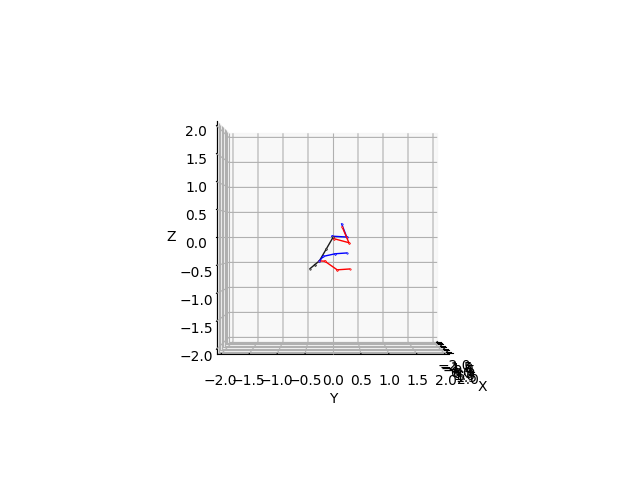

In [25]:
fig = plt.figure(0)
fig.clear()
ax = axes_3d(fig)
draw_3d_pose(ax, cam_3d_hat)
#draw_3d_pose(ax, img_25d_hat)
plt.show()

### kookmin_pkl2

In [36]:
data = readpkl('/home/hrai/codes/MotionBERT/data/motion3d/kookmin_pkl_with_kookmin_setting2/S11_1_squat.pkl')
data.keys()

dict_keys(['joint_2d', 'confidence', 'joint3d_image', 'joints_2.5d_image', '2.5d_factor', 'camera_name', 'action', 'source', 'frame', 'world_3d', 'cam_3d', 'cam_param'])

In [37]:
source = data['source']
joint_2d = data['joint_2d']
cam_3d = data['cam_3d'][0]/1000.0
img_25d = data['joints_2.5d_image'][0]/1000.0
cam_3d_hat = get_rootrel_pose(cam_3d)
img_25d_hat = get_rootrel_pose(img_25d)

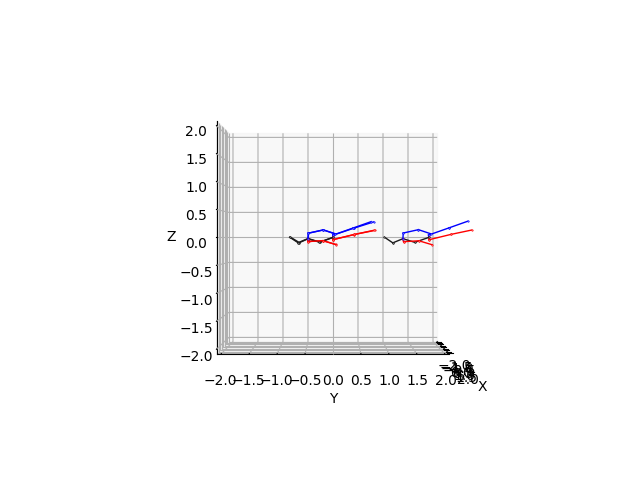

In [38]:
fig = plt.figure(0)
fig.clear()
ax = axes_3d(fig)
draw_3d_pose(ax, cam_3d_hat)
draw_3d_pose(ax, img_25d_hat)
draw_3d_pose(ax, cam_3d)
draw_3d_pose(ax, img_25d)
plt.show()

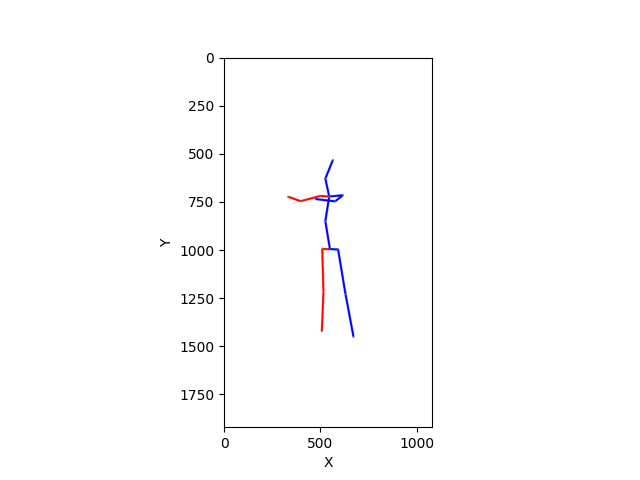

In [41]:
fig = plt.figure(1)
fig.clear()
ax = axes_2d(fig, H=1920, W=1080)
img = get_2d_pose_image(joint_2d[500], H=1920, W=1080)
ax.imshow(img)
plt.show()